<a href="https://colab.research.google.com/github/JinghengYu21/Cycling-Transactions-Cohort-Analysis/blob/main/Cycling_Transaction_Cohort_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

# **Data Loading and Cleaning**

In [ ]:
#Import the transaction dataset
tran_df = pd.read_excel("C:\\Users\\yu\\Desktop\\KPMG_VI_New_raw_data_update_final.xlsx", "Transactions")
tran_df.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145


In [ ]:
tran_df.columns=tran_df.iloc[0,]
tran_df.drop([0],axis=0,inplace=True)
tran_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [ ]:
#Check Missing Value
print(tran_df.info())
#Numeric variables
print(tran_df.isnull().values.sum())
tran_df= tran_df.fillna(tran_df.mean())
print(tran_df.isnull().values.sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   transaction_id           20000 non-null  object
 1   product_id               20000 non-null  object
 2   customer_id              20000 non-null  object
 3   transaction_date         20000 non-null  object
 4   online_order             19640 non-null  object
 5   order_status             20000 non-null  object
 6   brand                    19803 non-null  object
 7   product_line             19803 non-null  object
 8   product_class            19803 non-null  object
 9   product_size             19803 non-null  object
 10  list_price               20000 non-null  object
 11  standard_cost            19803 non-null  object
 12  product_first_sold_date  19803 non-null  object
dtypes: object(13)
memory usage: 2.0+ MB
None
1542


C:\Users\yu\AppData\Local\Temp\ipykernel_76760\2248861187.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  tran_df= tran_df.fillna(tran_df.mean())


788


In [ ]:
#objects
for col in tran_df.columns:
    if tran_df[col].dtypes == 'object':
        tran_df[col]=  tran_df[col].fillna(tran_df[col].value_counts().index[0])
print(tran_df.isnull().values.sum())

0


In [ ]:
#Import the CustomerDemographic dataset
cust_df = pd.read_excel('C:\\Users\\yu\\Desktop\\KPMG_VI_New_raw_data_update_final.xlsx',sheet_name="CustomerDemographic")
cust_df.head()

C:\Users\yu\AppData\Local\Temp\ipykernel_76760\3458378481.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  cust_df = pd.read_excel('C:\\Users\\yu\\Desktop\\KPMG_VI_New_raw_data_update_final.xlsx',sheet_name="CustomerDemographic")


,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,34,Jephthah Bachmann,U,59,1843-12-21,NaN,Legal Assistant,IT,Affluent Customer,N,No,20.0
1,144,Jory Barrabeale,U,71,NaT,120.0,Environmental Tech,IT,Mass Customer,N,No,NaN
2,168,Reggie Broggetti,U,8,NaT,120.0,General Manager,IT,Affluent Customer,N,Yes,NaN
3,267,Edgar Buckler,U,53,NaT,120.0,NaN,IT,High Net Worth,N,No,NaN
4,290,Giorgio Kevane,U,42,NaT,120.0,Senior Sales Associate,IT,Mass Customer,N,No,NaN


In [ ]:
print(cust_df.info())
print(cust_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   name                                 4000 non-null   object        
 2   gender                               4000 non-null   object        
 3   past_3_years_bike_related_purchases  4000 non-null   int64         
 4   DOB                                  3913 non-null   datetime64[ns]
 5   age                                  3999 non-null   float64       
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

<Axes: >

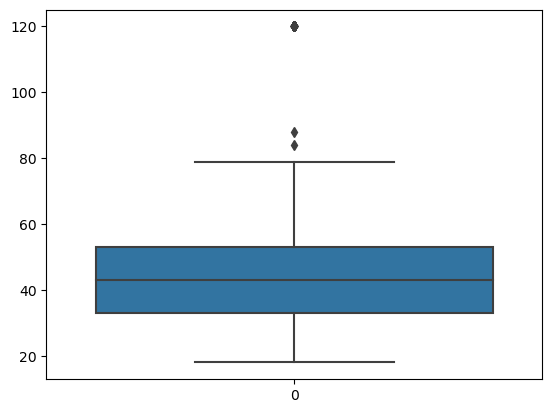

In [ ]:
#create a box plot
sns.boxplot(data=cust_df['age'])

In [ ]:
#Delete outliers
def drop_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   dropped_outliers = outliers.dropna().reset_index()

   return  dropped_outliers

age_df = drop_outliers_IQR(cust_df['age'])

cust_df.drop(age_df['index'],axis=0,inplace=True)


In [ ]:
cust_df.head()

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,34,Jephthah Bachmann,U,59,1843-12-21,NaN,Legal Assistant,IT,Affluent Customer,N,No,20.0
90,3410,Merrili Brittin,Female,93,1940-09-22,79.0,NaN,Property,Mass Customer,N,No,16.0
91,658,Donn Bonnell,Male,38,1944-01-24,76.0,Tax Accountant,Manufacturing,Affluent Customer,N,Yes,8.0
92,2413,Abbey Murrow,Male,27,1943-08-11,76.0,Environmental Specialist,Manufacturing,High Net Worth,N,Yes,17.0
93,1,Laraine Medendorp,Female,93,1953-10-12,66.0,Executive Secretary,Health,Mass Customer,N,Yes,11.0


In [ ]:
#Data imputation
cust_df['gender'].replace('U','Uknown',inplace=True)
#cust_df['owns_car'].replace('Yes','1',inplace=True)
#cust_df['owns_car'].replace('No', '0', inplace=True)
cust_df[['job_title','job_industry_category']]=cust_df[['job_title','job_industry_category']].fillna('Unknown')
print(cust_df.isnull().values.sum())
#Remove missing value
cust_df = cust_df.replace(" ",np.NaN)
cust_df=cust_df.dropna()
print(cust_df.isnull().values.sum())

1
0


In [ ]:
cust_df.reset_index(inplace=True,drop=True)
cust_df.head()

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,3410,Merrili Brittin,Female,93,1940-09-22,79.0,Unknown,Property,Mass Customer,N,No,16.0
1,658,Donn Bonnell,Male,38,1944-01-24,76.0,Tax Accountant,Manufacturing,Affluent Customer,N,Yes,8.0
2,2413,Abbey Murrow,Male,27,1943-08-11,76.0,Environmental Specialist,Manufacturing,High Net Worth,N,Yes,17.0
3,1,Laraine Medendorp,Female,93,1953-10-12,66.0,Executive Secretary,Health,Mass Customer,N,Yes,11.0
4,3,Arlin Dearle,Male,61,1954-01-20,66.0,Recruiting Manager,Property,Mass Customer,N,Yes,15.0


In [ ]:
#Import the CustomerAddress dataset
df_add = pd.read_excel('C:\\Users\\yu\\Desktop\\KPMG_VI_New_raw_data_update_final.xlsx', "CustomerAddress")
df_add.columns = df_add.iloc[0]
df_add.drop([0],axis=0,inplace=True)
df_add['state'].replace('New South Wales','NSW',inplace=True)
df_add['state'].replace('Victoria','VIC',inplace=True)
#Check missing values
df_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 1 to 3999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   object
 1   address             3999 non-null   object
 2   postcode            3999 non-null   object
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   object
dtypes: object(6)
memory usage: 187.6+ KB


# **Cohort Analysis**

In [ ]:
tran_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
2,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
3,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
4,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
5,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [ ]:
dt.datetime(tran_df['transaction_date'][1].year, tran_df['transaction_date'][1].month,1)

datetime.datetime(2017, 2, 1, 0, 0)

In [ ]:
def tran_month(x):
    return dt.datetime(x.year,x.month,1)
tran_df['transaction_month']=tran_df['transaction_date'].apply(tran_month)
tran_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,transaction_month
1,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-01
2,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-01
3,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-01
4,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-01
5,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01


In [ ]:
tran_df['Cohort_Month']=tran_df.groupby('customer_id')['transaction_month'].transform('min')
tran_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,transaction_month,Cohort_Month
1,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-01,2017-02-01
2,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-01,2017-01-01
3,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-01,2017-01-01
4,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-01,2017-02-01
5,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01,2017-01-01


In [ ]:
def date(df,col):
    year =  df[col].dt.year
    month = df[col].dt.month
    day = df[col].dt.day
    return year,month,day

tran_year,tran_month,tran_day = date(tran_df,'transaction_month')
cohort_year,cohort_month,cohort_day = date(tran_df,'Cohort_Month')

In [ ]:
year_diff = tran_year-cohort_year
month_diff= tran_month-cohort_month

#First month is signed as 1 for easier interpretation
total_diff = month_diff + year_diff*12 +1
total_diff

tran_df['Cohort_Index'] = total_diff
tran_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,transaction_month,Cohort_Month,Cohort_Index
1,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-01,2017-02-01,1
2,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-01,2017-01-01,5
3,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-01,2017-01-01,10
4,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-01,2017-02-01,7
5,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01,2017-01-01,10


In [ ]:
Cohort_df = tran_df[['customer_id','Cohort_Month','Cohort_Index']]
Cohort_df = Cohort_df.drop_duplicates(subset=['customer_id','Cohort_Month','Cohort_Index'], keep='first')
Cohort_df= Cohort_df.groupby(['Cohort_Month','Cohort_Index'])[['customer_id']].count().reset_index()
Cohort_df= Cohort_df.rename(columns={'customer_id':'customer_count'})

In [ ]:
Cohort_df

,Cohort_Month,Cohort_Index,customer_count
0,2017-01-01,1,1354
1,2017-01-01,2,486
2,2017-01-01,3,508
3,2017-01-01,4,509
4,2017-01-01,5,502
...,...,...,...
73,2017-10-01,2,6
74,2017-10-01,3,8
75,2017-11-01,1,13
76,2017-11-01,2,5


In [ ]:
Cohort_df.pivot(index='Cohort_Month',  columns ='Cohort_Index', values = 'customer_count')

Cohort_Index,1,2,3,4,5,6,7,8,9,10,11,12
Cohort_Month,,,,,,,,,,,,
2017-01-01,1354.0,486.0,508.0,509.0,502.0,483.0,518.0,529.0,500.0,531.0,497.0,516.0
2017-02-01,800.0,325.0,298.0,313.0,288.0,298.0,308.0,281.0,329.0,308.0,296.0,NaN
2017-03-01,484.0,167.0,174.0,167.0,182.0,184.0,172.0,212.0,189.0,181.0,NaN,NaN
2017-04-01,336.0,111.0,121.0,153.0,143.0,121.0,142.0,126.0,132.0,NaN,NaN,NaN
2017-05-01,210.0,85.0,81.0,87.0,71.0,74.0,73.0,81.0,NaN,NaN,NaN,NaN
2017-06-01,122.0,45.0,44.0,47.0,46.0,46.0,53.0,NaN,NaN,NaN,NaN,NaN
2017-07-01,77.0,26.0,29.0,32.0,37.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,51.0,19.0,21.0,17.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,23.0,7.0,7.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Cohort_data = Cohort_df.pivot(index='Cohort_Month',  columns ='Cohort_Index', values = 'customer_count')
Retention_rate = Cohort_data.divide(Cohort_data.loc[:,1],axis=0).round(3)*100
Retention_rate

Cohort_Index,1,2,3,4,5,6,7,8,9,10,11,12
Cohort_Month,,,,,,,,,,,,
2017-01-01,100.0,35.9,37.5,37.6,37.1,35.7,38.3,39.1,36.9,39.2,36.7,38.1
2017-02-01,100.0,40.6,37.2,39.1,36.0,37.2,38.5,35.1,41.1,38.5,37.0,NaN
2017-03-01,100.0,34.5,36.0,34.5,37.6,38.0,35.5,43.8,39.0,37.4,NaN,NaN
2017-04-01,100.0,33.0,36.0,45.5,42.6,36.0,42.3,37.5,39.3,NaN,NaN,NaN
2017-05-01,100.0,40.5,38.6,41.4,33.8,35.2,34.8,38.6,NaN,NaN,NaN,NaN
2017-06-01,100.0,36.9,36.1,38.5,37.7,37.7,43.4,NaN,NaN,NaN,NaN,NaN
2017-07-01,100.0,33.8,37.7,41.6,48.1,31.2,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,100.0,37.3,41.2,33.3,25.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,100.0,30.4,30.4,39.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


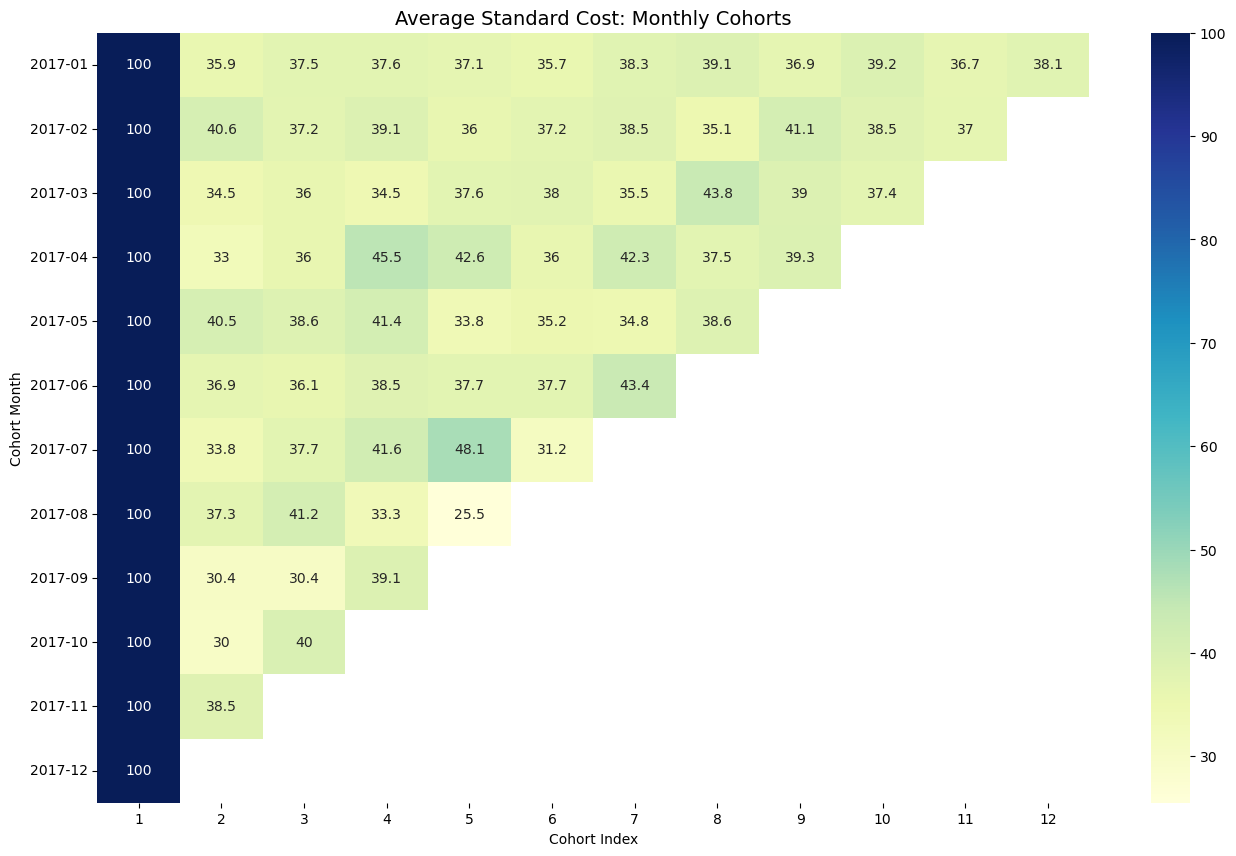

In [ ]:
#Visualize retention rate
#Heatmap
fig, ax = plt.subplots(1,1,figsize = (16,10))
Retention_rate.index = Retention_rate.index.strftime('%Y-%m')

sns.heatmap(Retention_rate, annot = True, cmap="YlGnBu", fmt='g')

ax.set_xlabel('Cohort Index')
ax.set_ylabel("Cohort Month")
#ax.xaxis.set_label_position('top')
plt.yticks( rotation='horizontal')
plt.title('Average Standard Cost: Monthly Cohorts', fontsize = 14)
plt.show()


In [ ]:
Retention_rate.index

DatetimeIndex(['2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', name='Cohort_Month', freq=None)

# ***EDA***

In [ ]:
#Merge Transcation and Customer Demographic datasets
tran_cust_df = tran_df.merge(cust_df,how='inner', on='customer_id')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19527 entries, 0 to 19526
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19527 non-null  int64         
 1   product_id                           19527 non-null  int64         
 2   customer_id                          19527 non-null  int64         
 3   transaction_date                     19527 non-null  datetime64[ns]
 4   online_order                         19527 non-null  object        
 5   order_status                         19527 non-null  object        
 6   brand                                19527 non-null  object        
 7   product_line                         19527 non-null  object        
 8   product_class                        19527 non-null  object        
 9   product_size                         19527 non-null  object        
 10  list_price

In [ ]:
#Complete customer dataset
cust_complete=cust_df.merge(df_add,how='inner', on='customer_id')
cust_complete.head()

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,3410,Merrili Brittin,Female,93,1940-09-22,79.0,Unknown,Property,Mass Customer,N,No,16.0,1351 Lunder Road,2049,NSW,Australia,10
1,658,Donn Bonnell,Male,38,1944-01-24,76.0,Tax Accountant,Manufacturing,Affluent Customer,N,Yes,8.0,355 Thackeray Circle,3025,VIC,Australia,9
2,2413,Abbey Murrow,Male,27,1943-08-11,76.0,Environmental Specialist,Manufacturing,High Net Worth,N,Yes,17.0,423 Debra Terrace,3082,VIC,Australia,8
3,1,Laraine Medendorp,Female,93,1953-10-12,66.0,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10
4,11,Uriah Bisatt,Male,99,1954-04-30,66.0,Unknown,Property,Mass Customer,N,No,9.0,93405 Ludington Park,3044,VIC,Australia,8


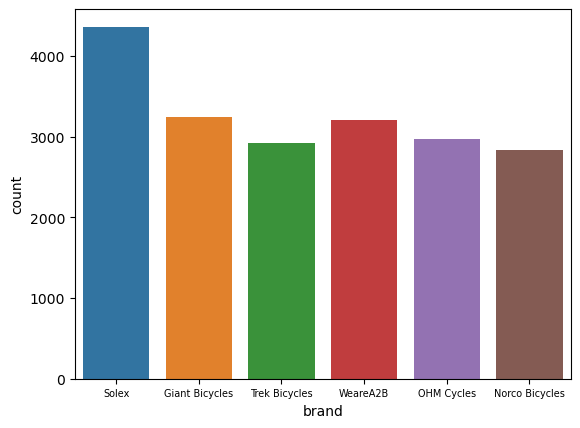

In [ ]:
#brand-bar chart
#plt.figure(figsize=(6,5))
brand = sns.countplot(data= tran_cust_df,x ='brand')
brand.set_xticklabels(brand.get_xticklabels(), fontsize=7)
#plt.tight_layout()
plt.show()
#solex
#make it to a pie chart

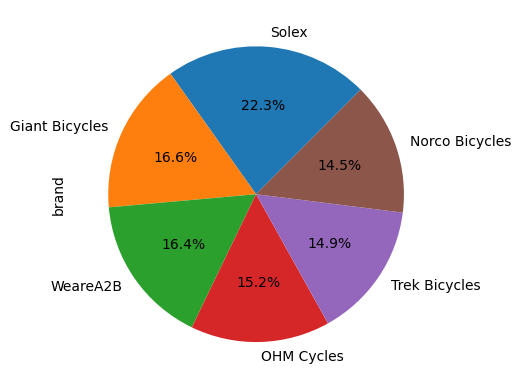

In [ ]:
data=tran_cust_df['brand'].value_counts()
#Pie Chart
#fig=plt.figure(figsize=(8,8))
#explode=(0.1,0.1,0.1,0.1,0.1,0.1)
data.plot.pie(autopct="%.1f%%",startangle=45);

<Axes: >

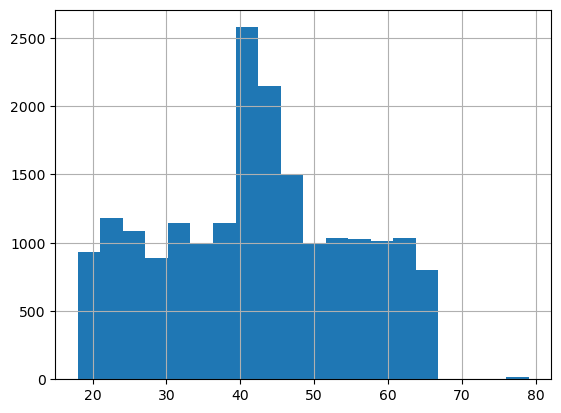

In [ ]:
#Histgram
tran_cust_df['age'].hist(bins = 20)
#Age 40-50占比多

C:\Users\yu\AppData\Local\Temp\ipykernel_76760\2781437544.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99)` for the same effect.

  sns.pointplot(x='gender', y='past_3_years_bike_related_purchases', hue='owns_car', data=tran_cust_df,  estimator=np.mean, ci=99,


<Axes: xlabel='gender', ylabel='past_3_years_bike_related_purchases'>

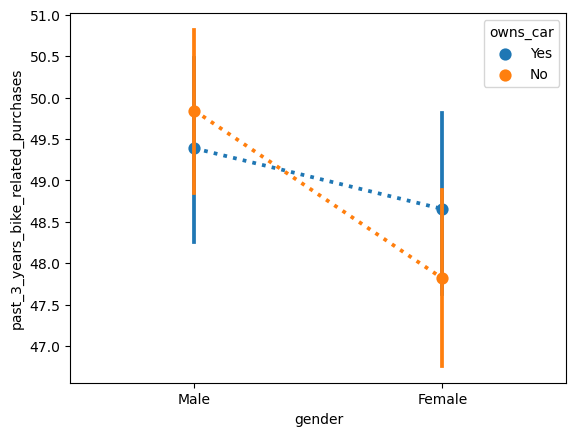

In [ ]:
#Pointplot
sns.pointplot(x='gender', y='past_3_years_bike_related_purchases', hue='owns_car', data=tran_cust_df,  estimator=np.mean, ci=99,
                 n_boot=1000,  markers="o",
                 linestyles=":")

# owns a car is gender sensitive

<Figure size 1000x600 with 0 Axes>

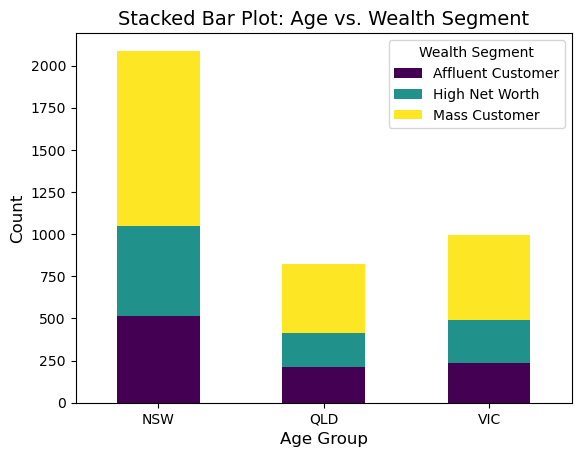

In [ ]:
# Stacked bar plot
pivot_df = cust_complete.pivot_table(index='state', columns='wealth_segment', aggfunc='size', fill_value=0)
plt.figure(figsize=(10, 6))
pivot_df.plot(kind='bar', stacked=True, cmap='viridis')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Stacked Bar Plot: Age vs. Wealth Segment', fontsize=14)
plt.legend(title='Wealth Segment', fontsize=10)
plt.xticks(rotation=0)
plt.show()

<Axes: xlabel='count', ylabel='job_industry_category'>

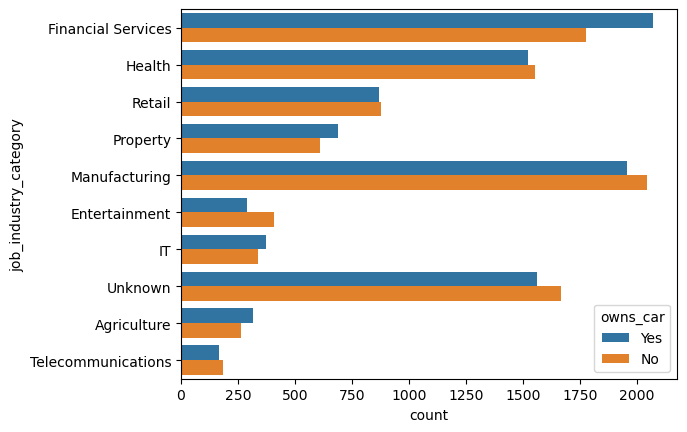

In [ ]:
sns.countplot(y='job_industry_category',hue='owns_car',data=tran_cust_df)

Text(0.5, 1.0, 'Box Plot: Listing Price by Brand')

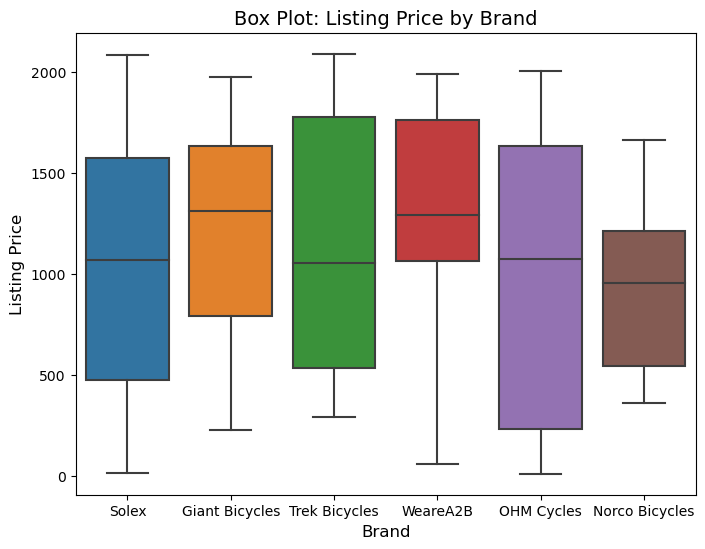

In [ ]:
# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='brand', y='list_price', data=tran_cust_df)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Listing Price', fontsize=12)
plt.title('Box Plot: Listing Price by Brand', fontsize=14)

# ***Root Cause Analysis***

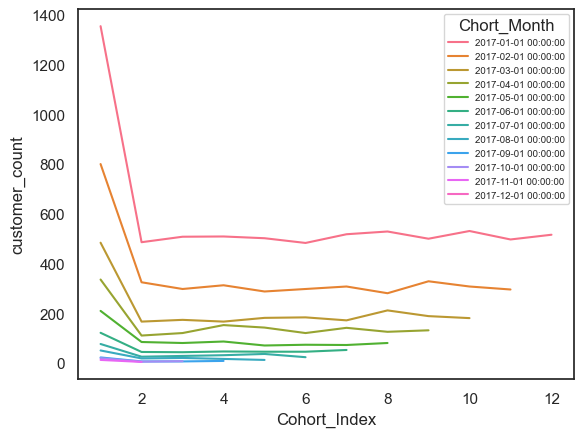

In [ ]:
sns.lineplot(x = "Cohort_Index", y = "customer_count",hue='Cohort_Month', data=Cohort_df)
plt.legend(loc='upper right',title='Chort_Month',fontsize=7)
plt.show()

In [ ]:
Cohort_df['Cohort_Month'] = Cohort_df['Cohort_Month'].strftime('%Y-%m')


NameError: name 'Cohort_df' is not defined

In [ ]:
# Analyze two cohorts: 2017-11(48.1) vs 2017-12(31.2)
df_48= tran_cust_df[(tran_cust_df1['Cohort_Month']== '2017-07-01')& (tran_cust_df1['Cohort_Index'] == 5)]
df_31= tran_cust_df[(tran_cust_df1['Cohort_Month'] == '2017-07-01') & (tran_cust_df1['Cohort_Index'] == 6)]

In [ ]:
# customers in df_48 not in df_31
NA_rows_mask = merged_data.isna().any(axis=1)
NA_rows_df = merged_data[NA_rows_mask]
NA_rows_df.head()

,transaction_id_x,product_id_x,customer_id,transaction_date_x,online_order_x,order_status_x,brand_x,product_line_x,product_class_x,product_size_x,...,gender_y,past_3_years_bike_related_purchases_y,DOB_y,age_y,job_title_y,job_industry_category_y,wealth_segment_y,deceased_indicator_y,owns_car_y,tenure_y
0,10186,87,119,2017-11-30,True,Approved,OHM Cycles,Standard,medium,medium,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19190,68,1516,2017-11-23,True,Approved,OHM Cycles,Standard,medium,medium,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19288,62,1516,2017-11-07,True,Approved,Solex,Standard,medium,medium,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11275,75,1019,2017-11-18,True,Approved,Giant Bicycles,Touring,medium,large,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,17493,50,437,2017-11-12,True,Approved,WeareA2B,Standard,medium,small,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
NA_new = NA_rows_df.drop_duplicates(subset=['customer_id'],keep='first')
mask_id1 = NA_new['customer_id']
group = df_48_1[df_48_1['customer_id'].isin(mask_id)].reset_index(drop=True)
group = group.drop_duplicates(subset=['customer_id'],keep='first').reset_index(drop=True)
group.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,10186,87,119,2017-11-30,True,Approved,OHM Cycles,Standard,medium,medium,...,Male,9,1981-12-04,38.0,Associate Professor,Unknown,High Net Worth,N,Yes,9.0
1,19190,68,1516,2017-11-23,True,Approved,OHM Cycles,Standard,medium,medium,...,Male,6,1967-07-12,52.0,VP Sales,IT,Affluent Customer,N,No,19.0
2,11275,75,1019,2017-11-18,True,Approved,Giant Bicycles,Touring,medium,large,...,Male,42,1973-11-19,46.0,Human Resources Assistant II,Manufacturing,Mass Customer,N,Yes,14.0
3,17493,50,437,2017-11-12,True,Approved,WeareA2B,Standard,medium,small,...,Male,24,1976-08-14,43.0,Systems Administrator III,Manufacturing,Affluent Customer,N,Yes,17.0
4,17715,67,3211,2017-11-25,True,Approved,Solex,Standard,medium,large,...,Female,52,1993-06-12,26.0,Automation Specialist II,Health,High Net Worth,N,Yes,7.0


In [ ]:
group.shape

(26, 27)

# ***EDA of the two cohorts***

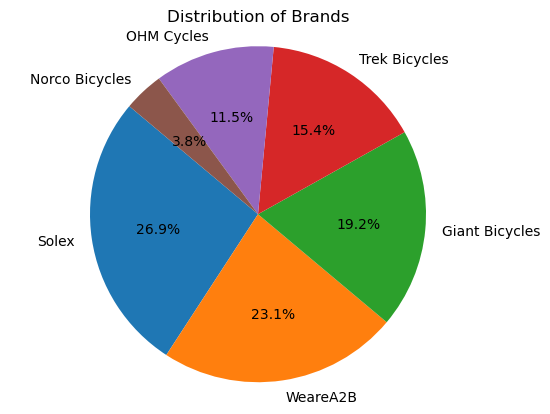

In [ ]:
# brand distribution
brand_counts=group['brand'].value_counts()
plt.pie(brand_counts,labels = brand_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Brands')
plt.axis('equal')
plt.show()
#Norco Bicyles is the least preferred ， solex 比较多，可能因为solex用户体验感下降

<Figure size 1000x600 with 0 Axes>

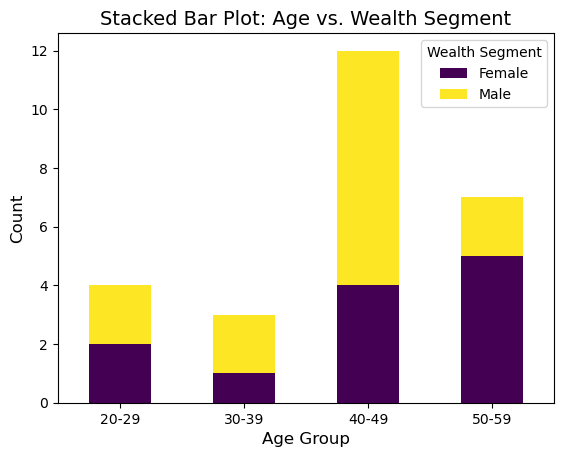

In [ ]:
#Age distribution
age_bins = [20, 30, 40, 50,60]
# Group ages into bins using 'cut'
group['age_group'] = pd.cut(group['age'], bins=age_bins, labels=['20-29', '30-39', '40-49','50-59'])
pivot_df = group.pivot_table(index='age_group', columns='gender', aggfunc='size', fill_value=0)
# Create the stacked bar plot
plt.figure(figsize=(10, 6))
pivot_df.plot(kind='bar', stacked=True, cmap='viridis')
# Customize the plot
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Stacked Bar Plot: Age vs. Wealth Segment', fontsize=14)
plt.legend(title='Wealth Segment', fontsize=10)
plt.xticks(rotation=0)
plt.show()

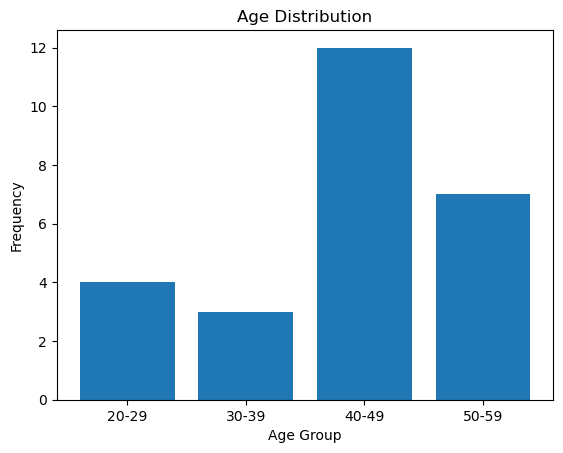

In [ ]:
#Age distribution
age_bins = [20, 30, 40, 50,60]

# Group ages into bins using 'cut'
group['age_group'] = pd.cut(group['age'], bins=age_bins, labels=['20-29', '30-39', '40-49','50-59'])

# Count the occurrences of each age group
age_counts = group['age_group'].value_counts().sort_index()

# Plot the bar chart
plt.bar(age_counts.index, age_counts.values)
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()
# Age > 40 has a large proprtion

Text(0.5, 1.0, 'Swarmplot:Product Line, Age and Product Size')

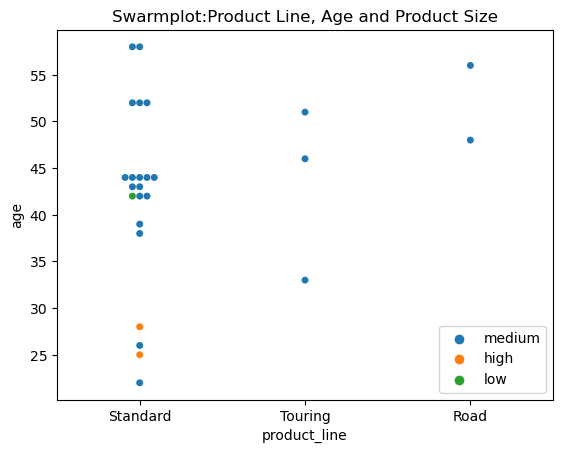

In [ ]:
#Swarmplot
sns.swarmplot(x='product_line',y='age',hue='product_class', data=group,
                      edgecolor="gray", linewidth=0)
plt.legend(loc='best')
plt.title('Swarmplot:Product Line, Age and Product Size')
#Most customer prefer standard quality and medium size product

C:\Users\yu\AppData\Local\Temp\ipykernel_76760\229246581.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  strip_plot.set_xticklabels(strip_plot.get_xticklabels(), fontsize=7)


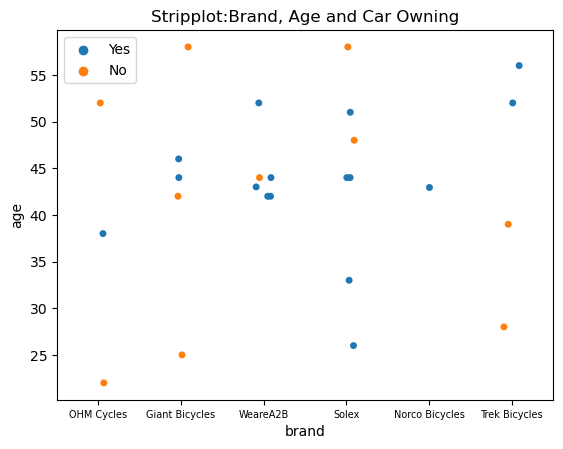

In [ ]:
#Sripplot
strip_plot =sns.stripplot(x='brand',y='age',hue='owns_car', data=group,
                      edgecolor="gray", linewidth=0)
strip_plot.set_xticklabels(strip_plot.get_xticklabels(), fontsize=7)
plt.legend(loc='best')
plt.title('Stripplot:Brand, Age and Car Owning')
plt.show()
#the number of customer owns car is larger than not own a car

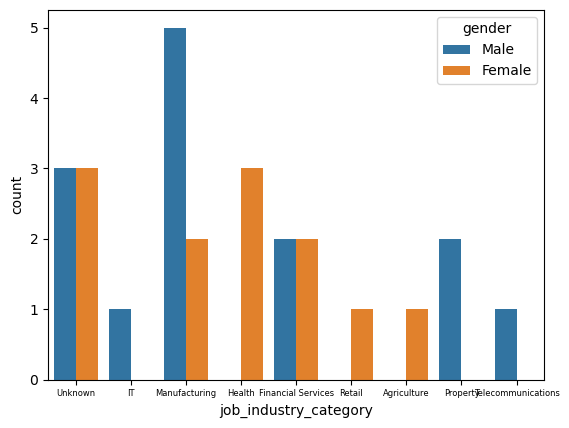

In [ ]:
job_plot = sns.countplot(x='job_industry_category',hue = 'gender',data=group)
job_plot.set_xticklabels(job_plot.get_xticklabels(), fontsize=6)
plt.show()

Text(0.5, 1.0, 'Box Plot: Listing Price by Brand')

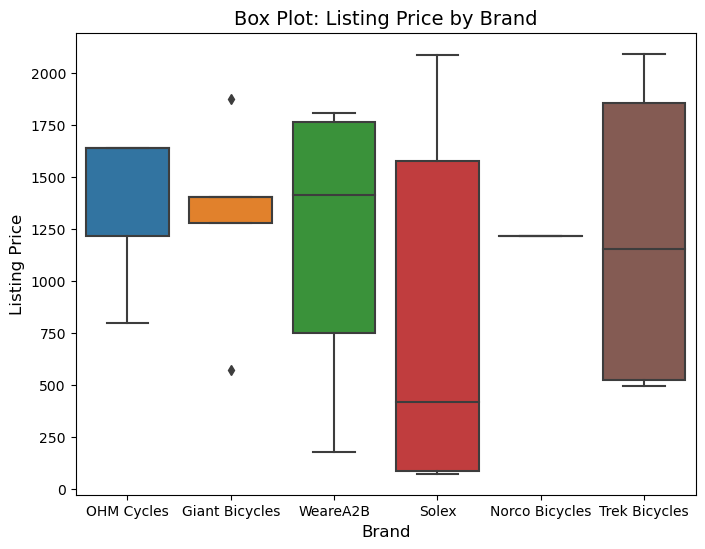

In [ ]:
#box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='brand', y='list_price', data=group)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Listing Price', fontsize=12)
plt.title('Box Plot: Listing Price by Brand', fontsize=14)

<Figure size 1000x600 with 0 Axes>

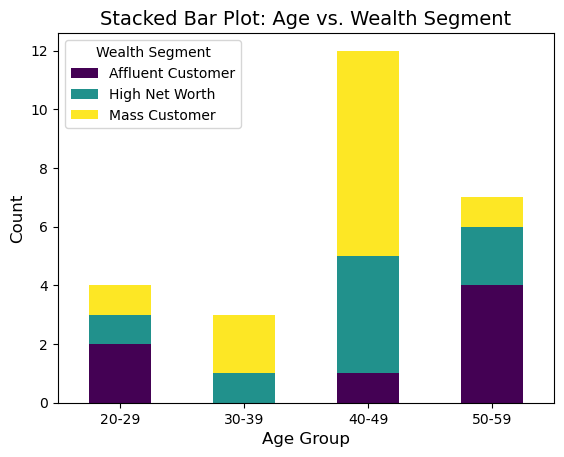

In [ ]:
# Stacked bar plot
# Define the age bins and corresponding labels for the age groups
age_bins = [20, 30, 40, 50,60]
# Group ages into bins using 'cut'
group['age_group'] = pd.cut(group['age'], bins=age_bins, labels=['20-29', '30-39', '40-49','50-59'])
pivot_df = group.pivot_table(index='age_group', columns='wealth_segment', aggfunc='size', fill_value=0)
# Create the stacked bar plot
plt.figure(figsize=(10, 6))
pivot_df.plot(kind='bar', stacked=True, cmap='viridis')
# Customize the plot
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Stacked Bar Plot: Age vs. Wealth Segment', fontsize=14)
plt.legend(title='Wealth Segment', fontsize=10)
plt.xticks(rotation=0)
plt.show()
# Show the plot